In [7]:
import sys, os
sys.path.append('..')

from dataset import load_data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import utils
from utils import eval_model, visualize_model, train_model
import models
import torchvision.models as models
import train as t
import const
import matplotlib.pyplot as plt

print(torch.cuda.get_device_name(0))

%load_ext autoreload
%autoreload 2

use_gpu = torch.cuda.is_available()
if use_gpu:
    device = torch.device('cuda')
    print ("using CUDA")
else:
    device = torch.device('cpu')
    
print(use_gpu)

Tesla K80
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using CUDA
True


In [8]:
train_data, val_data, test_data = load_data()

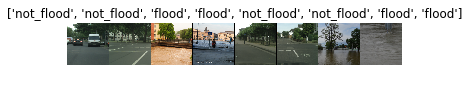

In [9]:
inputs, classes = next(iter(train_data))
utils.show_databatch(inputs, classes)

In [10]:
# load in resnet18 model
rn18 = models.resnet18(pretrained=True)
num_ftrs = rn18.fc.in_features
rn18.fc = nn.Linear(num_ftrs, len(const.CLASS_NAMES))

print(rn18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [11]:
optimizer_ft = optim.Adam(rn18.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

if use_gpu:
    criterion.cuda()
    rn18.cuda()

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [12]:
print("Test before training")
eval_model(rn18, test_data, criterion)

Test before training
Evaluating model
----------



0it [00:00, ?it/s]

Test batch 0/218


1it [00:00,  1.35it/s]
3it [00:00,  1.86it/s]
5it [00:01,  2.27it/s]
7it [00:01,  3.07it/s]
9it [00:01,  3.82it/s]
11it [00:01,  5.00it/s]
13it [00:02,  5.34it/s]
15it [00:02,  6.75it/s]
17it [00:02,  6.69it/s]
19it [00:02,  8.26it/s]
21it [00:02,  7.02it/s]
23it [00:03,  7.97it/s]
25it [00:03,  7.88it/s]
26it [00:03,  6.30it/s]
28it [00:03,  7.86it/s]
30it [00:04,  6.71it/s]
32it [00:04,  8.32it/s]
34it [00:04,  6.53it/s]
36it [00:04,  8.12it/s]
38it [00:05,  6.91it/s]
41it [00:05,  8.61it/s]
43it [00:05,  6.96it/s]
46it [00:06,  6.84it/s]
49it [00:06,  8.49it/s]
51it [00:06,  6.42it/s]
53it [00:06,  8.02it/s]
55it [00:07,  6.68it/s]
58it [00:07,  6.26it/s]
61it [00:08,  7.93it/s]
63it [00:08,  7.08it/s]
66it [00:08,  6.90it/s]
69it [00:09,  8.64it/s]
71it [00:09,  6.60it/s]
74it [00:10,  6.26it/s]
77it [00:10,  7.95it/s]
79it [00:10,  5.81it/s]
82it [00:11,  6.01it/s]
85it [00:11,  7.67it/s]
87it [00:11,  6.70it/s]
90it [00:12,  6.67it/s]
93it [00:12,  8.41it/s]
95it [00:12,  8.26it

Test batch 100/218


101it [00:13,  9.58it/s]
103it [00:13,  6.47it/s]
106it [00:14,  6.43it/s]
109it [00:14,  8.12it/s]
111it [00:14,  8.00it/s]
114it [00:14,  8.60it/s]
117it [00:15, 10.45it/s]
119it [00:15,  8.37it/s]
122it [00:15,  8.81it/s]
124it [00:16,  7.08it/s]
126it [00:16,  7.24it/s]
127it [00:16,  5.45it/s]
130it [00:16,  7.01it/s]
132it [00:17,  5.80it/s]
135it [00:17,  5.46it/s]
138it [00:18,  7.03it/s]
140it [00:18,  7.34it/s]
143it [00:18,  7.35it/s]
146it [00:18,  9.13it/s]
148it [00:19,  6.72it/s]
151it [00:19,  7.35it/s]
154it [00:19,  9.15it/s]
156it [00:20,  8.65it/s]
159it [00:20,  8.35it/s]
162it [00:20, 10.19it/s]
164it [00:20,  7.61it/s]
167it [00:21,  9.40it/s]
169it [00:21,  6.71it/s]
172it [00:22,  6.63it/s]
175it [00:22,  8.34it/s]
177it [00:22,  7.40it/s]
180it [00:22,  7.51it/s]
181it [00:23,  6.66it/s]
184it [00:23,  7.75it/s]
185it [00:23,  5.89it/s]
188it [00:23,  7.34it/s]
190it [00:24,  7.50it/s]
192it [00:24,  8.41it/s]
194it [00:24,  6.40it/s]
197it [00:25,  6.40it/s]

Test batch 200/218


202it [00:25,  6.74it/s]
205it [00:26,  7.00it/s]
208it [00:26,  8.75it/s]
210it [00:26,  6.52it/s]
213it [00:27,  6.58it/s]
216it [00:27,  8.32it/s]
218it [00:27,  6.47it/s]


Evaluation completed in 0m 29s
Avg loss (test): 0.0746
Avg acc (test): 0.7003
----------



0it [00:00, ?it/s]

Ground truth:


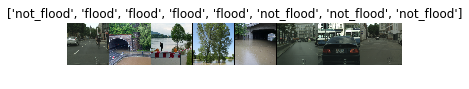

Prediction:


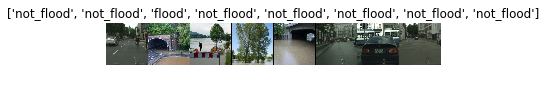

In [13]:
visualize_model(rn18, test_data) 

In [14]:
rn18_trained, loss_hist, train_acc_hist, val_acc_hist = train_model(train_data, val_data, rn18, criterion, optimizer_ft, exp_lr_scheduler, 10)
print (rn18_trained)
torch.save(rn18_trained.state_dict(), 'rn_train.pt')

Epoch 1/10
----------



0it [00:00, ?it/s]

Training batch 0/327.0


1it [00:00,  1.48it/s]
2it [00:00,  1.93it/s]
3it [00:00,  2.47it/s]
4it [00:01,  3.09it/s]
5it [00:01,  3.76it/s]
6it [00:01,  4.49it/s]
7it [00:01,  5.19it/s]
8it [00:01,  5.87it/s]
9it [00:01,  6.37it/s]
10it [00:01,  6.88it/s]
11it [00:01,  7.21it/s]
12it [00:02,  7.56it/s]
13it [00:02,  6.22it/s]
14it [00:02,  6.78it/s]
15it [00:02,  7.17it/s]
16it [00:02,  7.51it/s]
17it [00:02,  7.43it/s]
18it [00:02,  7.75it/s]
19it [00:03,  7.89it/s]
20it [00:03,  8.06it/s]
21it [00:03,  8.02it/s]
22it [00:03,  8.14it/s]
23it [00:03,  8.18it/s]
24it [00:03,  8.28it/s]
25it [00:03,  8.21it/s]
26it [00:03,  8.31it/s]
27it [00:04,  8.21it/s]
28it [00:04,  8.28it/s]
29it [00:04,  8.21it/s]
30it [00:04,  8.33it/s]
31it [00:04,  8.32it/s]
32it [00:04,  8.38it/s]
33it [00:04,  8.28it/s]
34it [00:04,  8.34it/s]
35it [00:04,  8.23it/s]
36it [00:05,  8.31it/s]
37it [00:05,  8.28it/s]
38it [00:05,  8.29it/s]
39it [00:05,  8.17it/s]
40it [00:05,  8.27it/s]
41it [00:05,  8.20it/s]
42it [00:05,  8.23it/s]


Training batch 100/327.0


101it [00:13,  8.07it/s]
102it [00:13,  8.17it/s]
103it [00:13,  8.22it/s]
104it [00:13,  8.23it/s]
105it [00:13,  8.21it/s]
106it [00:13,  8.33it/s]
107it [00:14,  8.25it/s]
108it [00:14,  8.29it/s]
109it [00:14,  8.22it/s]
110it [00:14,  8.24it/s]
111it [00:14,  8.17it/s]
112it [00:14,  8.26it/s]
113it [00:14,  7.69it/s]
114it [00:14,  7.93it/s]
115it [00:15,  8.00it/s]
116it [00:15,  8.19it/s]
117it [00:15,  5.61it/s]
118it [00:15,  6.25it/s]
119it [00:15,  6.72it/s]
120it [00:15,  7.16it/s]
121it [00:16,  5.99it/s]
122it [00:16,  6.56it/s]
123it [00:16,  7.03it/s]
124it [00:16,  7.40it/s]
125it [00:16,  7.58it/s]
126it [00:16,  7.82it/s]
127it [00:16,  8.00it/s]
128it [00:16,  8.07it/s]
129it [00:17,  7.93it/s]
130it [00:17,  8.09it/s]
131it [00:17,  8.19it/s]
132it [00:17,  8.29it/s]
133it [00:17,  6.73it/s]
134it [00:17,  7.19it/s]
135it [00:17,  7.51it/s]
136it [00:17,  7.77it/s]
137it [00:18,  6.02it/s]
138it [00:18,  6.62it/s]
139it [00:18,  7.06it/s]
140it [00:18,  7.44it/s]

Training batch 200/327.0


201it [00:26,  8.07it/s]
202it [00:26,  8.20it/s]
203it [00:26,  8.20it/s]
204it [00:26,  8.23it/s]
205it [00:26,  7.09it/s]
206it [00:26,  7.45it/s]
207it [00:27,  7.68it/s]
208it [00:27,  7.89it/s]
209it [00:27,  7.92it/s]
210it [00:27,  8.10it/s]
211it [00:27,  8.13it/s]
212it [00:27,  8.18it/s]
213it [00:27,  8.11it/s]
214it [00:27,  8.25it/s]
215it [00:28,  8.26it/s]
216it [00:28,  8.24it/s]
217it [00:28,  6.50it/s]
218it [00:28,  7.01it/s]
219it [00:28,  7.35it/s]
220it [00:28,  7.65it/s]
221it [00:29,  5.47it/s]
222it [00:29,  6.14it/s]
223it [00:29,  6.67it/s]
224it [00:29,  7.11it/s]
225it [00:29,  5.92it/s]
226it [00:29,  6.52it/s]
227it [00:29,  7.01it/s]
228it [00:29,  7.43it/s]
229it [00:30,  6.23it/s]
230it [00:30,  6.77it/s]
231it [00:30,  7.18it/s]
232it [00:30,  7.54it/s]
233it [00:30,  7.69it/s]
234it [00:30,  7.91it/s]
235it [00:30,  8.00it/s]
236it [00:31,  8.15it/s]
237it [00:31,  8.08it/s]
238it [00:31,  8.21it/s]
239it [00:31,  8.12it/s]
240it [00:31,  8.28it/s]

Training batch 300/327.0


301it [00:39,  6.69it/s]
302it [00:39,  7.10it/s]
303it [00:39,  6.72it/s]
304it [00:39,  7.16it/s]
305it [00:39,  7.47it/s]
306it [00:39,  7.73it/s]
307it [00:39,  7.72it/s]
308it [00:40,  7.98it/s]
309it [00:40,  7.96it/s]
310it [00:40,  8.11it/s]
311it [00:40,  8.07it/s]
312it [00:40,  8.16it/s]
313it [00:40,  8.23it/s]
314it [00:40,  8.23it/s]
315it [00:40,  8.15it/s]
316it [00:41,  8.20it/s]
317it [00:41,  8.25it/s]
318it [00:41,  8.22it/s]
319it [00:41,  8.14it/s]
320it [00:41,  8.17it/s]
321it [00:41,  8.23it/s]
322it [00:41,  8.21it/s]
323it [00:41,  8.20it/s]
324it [00:42,  8.17it/s]
325it [00:42,  8.27it/s]
326it [00:42,  6.67it/s]
327it [00:42,  7.08it/s]


tensor(2402, device='cuda:0')
Validation batch 0/218

../utils/utils.py:223: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)


Validation batch 200/218
Epoch 1 result: 
Avg loss (train): 0.0245
Avg acc (train): 0.9192
Avg loss (val): 0.0178
Avg acc (val): 0.9437
----------

Epoch 2/10
----------




0it [00:00, ?it/s]

Training batch 0/327.0



1it [00:00,  1.82it/s]

2it [00:00,  2.29it/s]

3it [00:00,  2.94it/s]

4it [00:00,  3.67it/s]

5it [00:01,  4.41it/s]

6it [00:01,  5.14it/s]

7it [00:01,  5.81it/s]

8it [00:01,  6.46it/s]

9it [00:01,  6.92it/s]

10it [00:01,  7.32it/s]

11it [00:01,  7.58it/s]

12it [00:01,  7.83it/s]

13it [00:02,  7.89it/s]

14it [00:02,  8.05it/s]

15it [00:02,  8.09it/s]

16it [00:02,  8.20it/s]

17it [00:02,  8.21it/s]

18it [00:02,  8.20it/s]

19it [00:02,  6.29it/s]

20it [00:02,  6.82it/s]

21it [00:03,  7.22it/s]

22it [00:03,  7.51it/s]

23it [00:03,  6.05it/s]

24it [00:03,  6.64it/s]

25it [00:03,  7.08it/s]

26it [00:03,  7.43it/s]

27it [00:03,  7.35it/s]

28it [00:04,  7.67it/s]

29it [00:04,  7.91it/s]

30it [00:04,  8.07it/s]

31it [00:04,  8.07it/s]

32it [00:04,  8.20it/s]

33it [00:04,  8.29it/s]

34it [00:04,  8.22it/s]

35it [00:04,  8.10it/s]

36it [00:05,  8.20it/s]

37it [00:05,  8.24it/s]

38it [00:05,  8.22it/s]

39it [00:05,  8.21it/s]

40it [00:05,  8.28it/s]

41it [0

Training batch 100/327.0



101it [00:13,  7.29it/s]

102it [00:13,  7.55it/s]

103it [00:13,  5.52it/s]

104it [00:13,  6.17it/s]

105it [00:13,  6.68it/s]

106it [00:13,  7.07it/s]

107it [00:14,  7.11it/s]

108it [00:14,  7.49it/s]

109it [00:14,  7.71it/s]

110it [00:14,  7.88it/s]

111it [00:14,  7.93it/s]

112it [00:14,  8.10it/s]

113it [00:14,  8.20it/s]

114it [00:14,  8.15it/s]

115it [00:15,  8.13it/s]

116it [00:15,  8.28it/s]

117it [00:15,  8.29it/s]

118it [00:15,  8.24it/s]

119it [00:15,  8.29it/s]

120it [00:15,  8.29it/s]

121it [00:15,  8.25it/s]

122it [00:15,  8.25it/s]

123it [00:16,  8.23it/s]

124it [00:16,  8.22it/s]

125it [00:16,  8.20it/s]

126it [00:16,  8.25it/s]

127it [00:16,  8.20it/s]

128it [00:16,  8.22it/s]

129it [00:16,  8.19it/s]

130it [00:16,  8.18it/s]

131it [00:17,  8.18it/s]

132it [00:17,  8.24it/s]

133it [00:17,  8.18it/s]

134it [00:17,  8.22it/s]

135it [00:17,  8.18it/s]

136it [00:17,  8.22it/s]

137it [00:17,  8.26it/s]

138it [00:17,  8.22it/s]

139it [00:

Training batch 200/327.0



201it [00:25,  7.95it/s]

202it [00:25,  7.96it/s]

203it [00:25,  8.06it/s]

204it [00:25,  8.20it/s]

205it [00:26,  8.19it/s]

206it [00:26,  8.17it/s]

207it [00:26,  8.22it/s]

208it [00:26,  8.30it/s]

209it [00:26,  8.25it/s]

210it [00:26,  7.11it/s]

211it [00:26,  7.45it/s]

212it [00:26,  7.74it/s]

213it [00:27,  7.85it/s]

214it [00:27,  7.88it/s]

215it [00:27,  8.03it/s]

216it [00:27,  8.19it/s]

217it [00:27,  8.19it/s]

218it [00:27,  8.14it/s]

219it [00:27,  8.09it/s]

220it [00:27,  8.22it/s]

221it [00:28,  8.19it/s]

222it [00:28,  7.71it/s]

223it [00:28,  7.89it/s]

224it [00:28,  8.07it/s]

225it [00:28,  8.17it/s]

226it [00:28,  8.09it/s]

227it [00:28,  8.18it/s]

228it [00:28,  8.29it/s]

229it [00:29,  8.34it/s]

230it [00:29,  7.03it/s]

231it [00:29,  7.38it/s]

232it [00:29,  7.67it/s]

233it [00:29,  7.84it/s]

234it [00:29,  7.87it/s]

235it [00:29,  7.98it/s]

236it [00:29,  8.10it/s]

237it [00:30,  8.19it/s]

238it [00:30,  8.21it/s]

239it [00:

Training batch 300/327.0



301it [00:38,  8.10it/s]

302it [00:38,  8.21it/s]

303it [00:38,  8.24it/s]

304it [00:38,  8.18it/s]

305it [00:38,  8.16it/s]

306it [00:38,  8.27it/s]

307it [00:38,  8.26it/s]

308it [00:38,  8.23it/s]

309it [00:39,  8.21it/s]

310it [00:39,  8.32it/s]

311it [00:39,  8.36it/s]

312it [00:39,  8.29it/s]

313it [00:39,  6.81it/s]

314it [00:39,  7.21it/s]

315it [00:39,  7.52it/s]

316it [00:39,  7.77it/s]

317it [00:40,  7.45it/s]

318it [00:40,  7.72it/s]

319it [00:40,  7.91it/s]

320it [00:40,  7.96it/s]

321it [00:40,  6.18it/s]

322it [00:40,  6.70it/s]

323it [00:40,  7.10it/s]

324it [00:41,  7.47it/s]

325it [00:41,  7.67it/s]

326it [00:41,  7.88it/s]

327it [00:41,  7.96it/s]


tensor(2454, device='cuda:0')
Validation batch 200/218
Epoch 2 result: 
Avg loss (train): 0.0211
Avg acc (train): 0.9392
Avg loss (val): 0.0148
Avg acc (val): 0.9501
----------

Epoch 3/10
----------





0it [00:00, ?it/s]

Training batch 0/327.0




1it [00:00,  1.57it/s]


2it [00:00,  2.07it/s]


3it [00:00,  2.67it/s]


4it [00:00,  3.38it/s]


5it [00:01,  3.70it/s]


6it [00:01,  4.47it/s]


7it [00:01,  5.21it/s]


8it [00:01,  5.91it/s]


9it [00:01,  6.07it/s]


10it [00:01,  6.60it/s]


11it [00:01,  7.01it/s]


12it [00:02,  7.43it/s]


13it [00:02,  7.64it/s]


14it [00:02,  7.79it/s]


15it [00:02,  7.98it/s]


16it [00:02,  8.15it/s]


17it [00:02,  8.16it/s]


18it [00:02,  8.14it/s]


19it [00:02,  8.22it/s]


20it [00:03,  8.33it/s]


21it [00:03,  8.29it/s]


22it [00:03,  6.81it/s]


23it [00:03,  7.25it/s]


24it [00:03,  7.61it/s]


25it [00:03,  7.81it/s]


26it [00:03,  7.85it/s]


27it [00:03,  8.03it/s]


28it [00:04,  8.20it/s]


29it [00:04,  8.22it/s]


30it [00:04,  7.11it/s]


31it [00:04,  7.48it/s]


32it [00:04,  7.78it/s]


33it [00:04,  7.95it/s]


34it [00:04,  8.01it/s]


35it [00:04,  8.08it/s]


36it [00:05,  8.22it/s]


37it [00:05,  8.30it/s]


38it [00:05,  8.37it/s]


39it [00:05,  8.39

Training batch 100/327.0




101it [00:13,  6.47it/s]


102it [00:13,  6.93it/s]


103it [00:13,  7.28it/s]


104it [00:13,  7.57it/s]


105it [00:13,  7.26it/s]


106it [00:13,  7.62it/s]


107it [00:13,  7.85it/s]


108it [00:13,  7.98it/s]


109it [00:14,  7.16it/s]


110it [00:14,  7.51it/s]


111it [00:14,  7.80it/s]


112it [00:14,  8.04it/s]


113it [00:14,  8.03it/s]


114it [00:14,  8.08it/s]


115it [00:14,  8.17it/s]


116it [00:14,  8.30it/s]


117it [00:15,  8.25it/s]


118it [00:15,  8.08it/s]


119it [00:15,  8.16it/s]


120it [00:15,  8.26it/s]


121it [00:15,  8.19it/s]


122it [00:15,  8.26it/s]


123it [00:15,  8.31it/s]


124it [00:15,  8.42it/s]


125it [00:16,  8.35it/s]


126it [00:16,  7.33it/s]


127it [00:16,  7.61it/s]


128it [00:16,  7.88it/s]


129it [00:16,  7.94it/s]


130it [00:16,  6.30it/s]


131it [00:16,  6.83it/s]


132it [00:17,  7.27it/s]


133it [00:17,  7.55it/s]


134it [00:17,  7.68it/s]


135it [00:17,  7.89it/s]


136it [00:17,  8.01it/s]


137it [00:17,  8.10it/s]


Training batch 200/327.0




201it [00:25,  8.37it/s]


202it [00:25,  8.37it/s]


203it [00:25,  8.23it/s]


204it [00:26,  8.20it/s]


205it [00:26,  8.22it/s]


206it [00:26,  8.35it/s]


207it [00:26,  8.38it/s]


208it [00:26,  8.39it/s]


209it [00:26,  8.31it/s]


210it [00:26,  8.39it/s]


211it [00:26,  8.36it/s]


212it [00:27,  8.35it/s]


213it [00:27,  8.25it/s]


214it [00:27,  8.34it/s]


215it [00:27,  8.32it/s]


216it [00:27,  8.44it/s]


217it [00:27,  8.35it/s]


218it [00:27,  8.43it/s]


219it [00:27,  8.37it/s]


220it [00:27,  8.36it/s]


221it [00:28,  8.28it/s]


222it [00:28,  8.39it/s]


223it [00:28,  8.37it/s]


224it [00:28,  8.37it/s]


225it [00:28,  8.28it/s]


226it [00:28,  8.41it/s]


227it [00:28,  8.42it/s]


228it [00:28,  8.44it/s]


229it [00:29,  8.28it/s]


230it [00:29,  8.39it/s]


231it [00:29,  8.44it/s]


232it [00:29,  8.50it/s]


233it [00:29,  8.38it/s]


234it [00:29,  8.35it/s]


235it [00:29,  8.39it/s]


236it [00:29,  8.40it/s]


237it [00:30,  8.35it/s]


Training batch 300/327.0




301it [00:37,  8.26it/s]


302it [00:37,  8.27it/s]


303it [00:37,  8.33it/s]


304it [00:38,  8.34it/s]


305it [00:38,  8.28it/s]


306it [00:38,  8.23it/s]


307it [00:38,  8.24it/s]


308it [00:38,  8.35it/s]


309it [00:38,  7.63it/s]


310it [00:38,  7.92it/s]


311it [00:38,  8.03it/s]


312it [00:39,  8.19it/s]


313it [00:39,  8.22it/s]


314it [00:39,  8.29it/s]


315it [00:39,  6.60it/s]


316it [00:39,  7.11it/s]


317it [00:39,  7.37it/s]


318it [00:39,  7.71it/s]


319it [00:39,  7.81it/s]


320it [00:40,  8.04it/s]


321it [00:40,  8.06it/s]


322it [00:40,  8.21it/s]


323it [00:40,  8.21it/s]


324it [00:40,  8.27it/s]


325it [00:40,  8.10it/s]


326it [00:40,  8.26it/s]


327it [00:40,  8.29it/s]


tensor(2480, device='cuda:0')
Validation batch 200/218
Epoch 3 result: 
Avg loss (train): 0.0166
Avg acc (train): 0.9491
Avg loss (val): 0.0132
Avg acc (val): 0.9558
----------

Epoch 4/10
----------






0it [00:00, ?it/s]

Training batch 0/327.0





1it [00:00,  1.79it/s]



2it [00:00,  2.33it/s]



3it [00:00,  2.96it/s]



4it [00:00,  3.68it/s]



5it [00:01,  4.40it/s]



6it [00:01,  4.23it/s]



7it [00:01,  4.97it/s]



8it [00:01,  5.68it/s]



9it [00:01,  6.28it/s]



10it [00:01,  6.33it/s]



11it [00:01,  6.83it/s]



12it [00:02,  7.25it/s]



13it [00:02,  7.55it/s]



14it [00:02,  7.66it/s]



15it [00:02,  7.89it/s]



16it [00:02,  8.06it/s]



17it [00:02,  8.12it/s]



18it [00:02,  8.10it/s]



19it [00:02,  8.20it/s]



20it [00:03,  8.28it/s]



21it [00:03,  8.26it/s]



22it [00:03,  8.21it/s]



23it [00:03,  8.28it/s]



24it [00:03,  8.32it/s]



25it [00:03,  8.32it/s]



26it [00:03,  8.24it/s]



27it [00:03,  8.27it/s]



28it [00:03,  8.31it/s]



29it [00:04,  8.27it/s]



30it [00:04,  8.25it/s]



31it [00:04,  8.26it/s]



32it [00:04,  8.25it/s]



33it [00:04,  8.25it/s]



34it [00:04,  8.23it/s]



35it [00:04,  8.30it/s]



36it [00:04,  8.28it/s]



37it [00:05,  8.30it/s]



38it [

Training batch 100/327.0





101it [00:13,  8.20it/s]



102it [00:13,  8.21it/s]



103it [00:13,  8.21it/s]



104it [00:13,  8.23it/s]



105it [00:13,  8.32it/s]



106it [00:13,  8.27it/s]



107it [00:13,  8.25it/s]



108it [00:13,  8.26it/s]



109it [00:14,  8.31it/s]



110it [00:14,  7.74it/s]



111it [00:14,  7.87it/s]



112it [00:14,  7.97it/s]



113it [00:14,  8.13it/s]



114it [00:14,  8.21it/s]



115it [00:14,  8.10it/s]



116it [00:14,  8.19it/s]



117it [00:15,  8.28it/s]



118it [00:15,  7.67it/s]



119it [00:15,  7.83it/s]



120it [00:15,  8.03it/s]



121it [00:15,  8.09it/s]



122it [00:15,  6.33it/s]



123it [00:15,  6.84it/s]



124it [00:16,  7.26it/s]



125it [00:16,  7.52it/s]



126it [00:16,  7.15it/s]



127it [00:16,  7.48it/s]



128it [00:16,  7.75it/s]



129it [00:16,  7.94it/s]



130it [00:16,  7.99it/s]



131it [00:16,  8.09it/s]



132it [00:17,  8.22it/s]



133it [00:17,  8.32it/s]



134it [00:17,  8.31it/s]



135it [00:17,  8.35it/s]



136it [00:17,  8

Training batch 200/327.0





201it [00:25,  8.21it/s]



202it [00:25,  8.19it/s]



203it [00:25,  8.29it/s]



204it [00:25,  8.36it/s]



205it [00:26,  8.35it/s]



206it [00:26,  8.32it/s]



207it [00:26,  8.33it/s]



208it [00:26,  8.34it/s]



209it [00:26,  8.22it/s]



210it [00:26,  8.35it/s]



211it [00:26,  8.39it/s]



212it [00:26,  8.36it/s]



213it [00:27,  8.25it/s]



214it [00:27,  8.32it/s]



215it [00:27,  8.36it/s]



216it [00:27,  8.34it/s]



217it [00:27,  8.25it/s]



218it [00:27,  8.36it/s]



219it [00:27,  8.29it/s]



220it [00:27,  8.25it/s]



221it [00:28,  8.24it/s]



222it [00:28,  8.30it/s]



223it [00:28,  8.31it/s]



224it [00:28,  8.28it/s]



225it [00:28,  8.26it/s]



226it [00:28,  8.24it/s]



227it [00:28,  8.26it/s]



228it [00:28,  8.23it/s]



229it [00:28,  8.31it/s]



230it [00:29,  8.28it/s]



231it [00:29,  8.30it/s]



232it [00:29,  8.26it/s]



233it [00:29,  8.26it/s]



234it [00:29,  8.13it/s]



235it [00:29,  8.21it/s]



236it [00:29,  8

Training batch 300/327.0





301it [00:38,  6.63it/s]



302it [00:38,  7.13it/s]



303it [00:38,  7.50it/s]



304it [00:38,  7.77it/s]



305it [00:38,  7.85it/s]



306it [00:38,  8.09it/s]



307it [00:38,  8.23it/s]



308it [00:39,  8.31it/s]



309it [00:39,  8.24it/s]



310it [00:39,  8.34it/s]



311it [00:39,  8.35it/s]



312it [00:39,  8.39it/s]



313it [00:39,  8.28it/s]



314it [00:39,  8.38it/s]



315it [00:39,  8.34it/s]



316it [00:40,  8.28it/s]



317it [00:40,  8.17it/s]



318it [00:40,  8.24it/s]



319it [00:40,  8.23it/s]



320it [00:40,  8.30it/s]



321it [00:40,  8.28it/s]



322it [00:40,  8.34it/s]



323it [00:40,  8.27it/s]



324it [00:40,  8.33it/s]



325it [00:41,  8.30it/s]



326it [00:41,  8.39it/s]



327it [00:41,  8.33it/s]


tensor(2490, device='cuda:0')
Validation batch 200/218
Epoch 4 result: 
Avg loss (train): 0.0150
Avg acc (train): 0.9529
Avg loss (val): 0.0172
Avg acc (val): 0.9541
----------

Epoch 5/10
----------







0it [00:00, ?it/s]

Training batch 0/327.0






1it [00:00,  1.44it/s]




2it [00:00,  1.92it/s]




3it [00:00,  2.50it/s]




4it [00:01,  3.17it/s]




5it [00:01,  3.86it/s]




6it [00:01,  4.60it/s]




7it [00:01,  5.33it/s]




8it [00:01,  5.99it/s]




9it [00:01,  6.49it/s]




10it [00:01,  7.02it/s]




11it [00:01,  7.41it/s]




12it [00:02,  7.68it/s]




13it [00:02,  7.84it/s]




14it [00:02,  7.98it/s]




15it [00:02,  8.05it/s]




16it [00:02,  8.14it/s]




17it [00:02,  8.12it/s]




18it [00:02,  8.20it/s]




19it [00:02,  8.16it/s]




20it [00:02,  8.27it/s]




21it [00:03,  8.25it/s]




22it [00:03,  8.24it/s]




23it [00:03,  8.10it/s]




24it [00:03,  8.19it/s]




25it [00:03,  8.25it/s]




26it [00:03,  8.27it/s]




27it [00:03,  8.20it/s]




28it [00:03,  8.32it/s]




29it [00:04,  8.34it/s]




30it [00:04,  8.36it/s]




31it [00:04,  8.30it/s]




32it [00:04,  8.42it/s]




33it [00:04,  8.36it/s]




34it [00:04,  8.30it/s]




35it [00:04,  6.21it/s]




36it [00:05,  6.75it/s]


Training batch 100/327.0






101it [00:13,  7.31it/s]




102it [00:13,  7.68it/s]




103it [00:13,  7.90it/s]




104it [00:13,  7.47it/s]




105it [00:14,  7.71it/s]




106it [00:14,  7.95it/s]




107it [00:14,  8.02it/s]




108it [00:14,  5.52it/s]




109it [00:14,  6.15it/s]




110it [00:14,  6.73it/s]




111it [00:14,  7.17it/s]




112it [00:15,  7.45it/s]




113it [00:15,  7.70it/s]




114it [00:15,  7.97it/s]




115it [00:15,  8.13it/s]




116it [00:15,  8.17it/s]




117it [00:15,  8.29it/s]




118it [00:15,  8.35it/s]




119it [00:15,  8.36it/s]




120it [00:15,  8.37it/s]




121it [00:16,  8.30it/s]




122it [00:16,  8.37it/s]




123it [00:16,  8.31it/s]




124it [00:16,  8.30it/s]




125it [00:16,  8.24it/s]




126it [00:16,  8.28it/s]




127it [00:16,  8.34it/s]




128it [00:16,  8.36it/s]




129it [00:17,  8.24it/s]




130it [00:17,  8.35it/s]




131it [00:17,  8.40it/s]




132it [00:17,  8.42it/s]




133it [00:17,  8.35it/s]




134it [00:17,  8.38it/s]




135it [00

Training batch 200/327.0






201it [00:25,  8.21it/s]




202it [00:25,  8.33it/s]




203it [00:26,  8.37it/s]




204it [00:26,  7.34it/s]




205it [00:26,  7.65it/s]




206it [00:26,  7.90it/s]




207it [00:26,  8.04it/s]




208it [00:26,  5.00it/s]




209it [00:27,  5.65it/s]




210it [00:27,  6.22it/s]




211it [00:27,  6.74it/s]




212it [00:27,  7.12it/s]




213it [00:27,  7.42it/s]




214it [00:27,  7.72it/s]




215it [00:27,  7.92it/s]




216it [00:27,  6.80it/s]




217it [00:28,  7.20it/s]




218it [00:28,  7.54it/s]




219it [00:28,  7.79it/s]




220it [00:28,  7.87it/s]




221it [00:28,  8.01it/s]




222it [00:28,  8.17it/s]




223it [00:28,  8.22it/s]




224it [00:28,  8.11it/s]




225it [00:29,  8.16it/s]




226it [00:29,  8.09it/s]




227it [00:29,  8.00it/s]




228it [00:29,  8.07it/s]




229it [00:29,  8.18it/s]




230it [00:29,  8.24it/s]




231it [00:29,  8.26it/s]




232it [00:29,  8.04it/s]




233it [00:30,  8.15it/s]




234it [00:30,  8.24it/s]




235it [00

Training batch 300/327.0






301it [00:38,  7.72it/s]




302it [00:38,  7.94it/s]




303it [00:38,  8.04it/s]




304it [00:39,  7.34it/s]




305it [00:39,  7.59it/s]




306it [00:39,  7.89it/s]




307it [00:39,  8.07it/s]




308it [00:39,  7.49it/s]




309it [00:39,  7.75it/s]




310it [00:39,  8.02it/s]




311it [00:39,  8.11it/s]




312it [00:40,  7.62it/s]




313it [00:40,  7.84it/s]




314it [00:40,  8.08it/s]




315it [00:40,  8.14it/s]




316it [00:40,  8.16it/s]




317it [00:40,  8.22it/s]




318it [00:40,  8.32it/s]




319it [00:40,  8.31it/s]




320it [00:41,  7.20it/s]




321it [00:41,  7.41it/s]




322it [00:41,  7.73it/s]




323it [00:41,  7.88it/s]




324it [00:41,  7.96it/s]




325it [00:41,  7.97it/s]




326it [00:41,  8.15it/s]




327it [00:41,  8.21it/s]


tensor(2489, device='cuda:0')
Validation batch 200/218
Epoch 5 result: 
Avg loss (train): 0.0142
Avg acc (train): 0.9525
Avg loss (val): 0.0162
Avg acc (val): 0.9483
----------

Epoch 6/10
----------








0it [00:00, ?it/s]

Training batch 0/327.0







1it [00:00,  1.60it/s]





2it [00:00,  2.11it/s]





3it [00:00,  2.71it/s]





4it [00:00,  3.41it/s]





5it [00:01,  4.13it/s]





6it [00:01,  4.88it/s]





7it [00:01,  5.55it/s]





8it [00:01,  6.21it/s]





9it [00:01,  6.59it/s]





10it [00:01,  6.98it/s]





11it [00:01,  7.32it/s]





12it [00:01,  7.69it/s]





13it [00:02,  6.52it/s]





14it [00:02,  6.99it/s]





15it [00:02,  7.36it/s]





16it [00:02,  7.71it/s]





17it [00:02,  7.44it/s]





18it [00:02,  7.72it/s]





19it [00:02,  7.08it/s]





20it [00:03,  7.48it/s]





21it [00:03,  7.68it/s]





22it [00:03,  7.90it/s]





23it [00:03,  8.02it/s]





24it [00:03,  8.15it/s]





25it [00:03,  8.13it/s]





26it [00:03,  8.14it/s]





27it [00:03,  8.18it/s]





28it [00:04,  8.32it/s]





29it [00:04,  8.26it/s]





30it [00:04,  8.32it/s]





31it [00:04,  8.30it/s]





32it [00:04,  8.35it/s]





33it [00:04,  8.32it/s]





34it [00:04,  8.26it/s]





35it [00:04,  8.2

Training batch 100/327.0







101it [00:13,  8.32it/s]





102it [00:13,  8.35it/s]





103it [00:13,  7.20it/s]





104it [00:13,  7.58it/s]





105it [00:13,  7.81it/s]





106it [00:13,  7.95it/s]





107it [00:13,  7.99it/s]





108it [00:14,  8.12it/s]





109it [00:14,  8.18it/s]





110it [00:14,  8.23it/s]





111it [00:14,  7.05it/s]





112it [00:14,  7.46it/s]





113it [00:14,  7.71it/s]





114it [00:14,  7.92it/s]





115it [00:15,  7.91it/s]





116it [00:15,  8.12it/s]





117it [00:15,  8.23it/s]





118it [00:15,  8.26it/s]





119it [00:15,  5.77it/s]





120it [00:15,  6.39it/s]





121it [00:15,  6.87it/s]





122it [00:16,  7.28it/s]





123it [00:16,  7.51it/s]





124it [00:16,  7.73it/s]





125it [00:16,  7.80it/s]





126it [00:16,  8.02it/s]





127it [00:16,  8.08it/s]





128it [00:16,  8.22it/s]





129it [00:16,  8.21it/s]





130it [00:16,  8.30it/s]





131it [00:17,  8.29it/s]





132it [00:17,  8.31it/s]





133it [00:17,  8.27it/s]





134i

Training batch 200/327.0







201it [00:26,  6.25it/s]





202it [00:26,  6.78it/s]





203it [00:26,  7.19it/s]





204it [00:26,  7.49it/s]





205it [00:26,  7.74it/s]





206it [00:26,  7.92it/s]





207it [00:26,  7.93it/s]





208it [00:26,  7.99it/s]





209it [00:26,  8.16it/s]





210it [00:27,  8.25it/s]





211it [00:27,  8.18it/s]





212it [00:27,  8.21it/s]





213it [00:27,  8.26it/s]





214it [00:27,  8.35it/s]





215it [00:27,  8.32it/s]





216it [00:27,  8.32it/s]





217it [00:27,  8.36it/s]





218it [00:28,  8.34it/s]





219it [00:28,  8.27it/s]





220it [00:28,  8.28it/s]





221it [00:28,  8.30it/s]





222it [00:28,  8.26it/s]





223it [00:28,  6.87it/s]





224it [00:28,  7.23it/s]





225it [00:28,  7.54it/s]





226it [00:29,  7.78it/s]





227it [00:29,  7.90it/s]





228it [00:29,  8.02it/s]





229it [00:29,  8.18it/s]





230it [00:29,  8.17it/s]





231it [00:29,  8.21it/s]





232it [00:29,  8.33it/s]





233it [00:29,  8.34it/s]





234i

Training batch 300/327.0







301it [00:38,  6.71it/s]





302it [00:38,  7.15it/s]





303it [00:38,  7.47it/s]





304it [00:38,  7.73it/s]





305it [00:39,  5.44it/s]





306it [00:39,  6.05it/s]





307it [00:39,  6.63it/s]





308it [00:39,  7.12it/s]





309it [00:39,  7.38it/s]





310it [00:39,  7.69it/s]





311it [00:39,  7.91it/s]





312it [00:40,  8.11it/s]





313it [00:40,  8.08it/s]





314it [00:40,  8.20it/s]





315it [00:40,  8.27it/s]





316it [00:40,  8.32it/s]





317it [00:40,  6.71it/s]





318it [00:40,  7.16it/s]





319it [00:41,  7.49it/s]





320it [00:41,  7.71it/s]





321it [00:41,  7.74it/s]





322it [00:41,  7.98it/s]





323it [00:41,  8.05it/s]





324it [00:41,  8.15it/s]





325it [00:41,  8.13it/s]





326it [00:41,  8.25it/s]





327it [00:42,  8.33it/s]


tensor(2502, device='cuda:0')
Validation batch 200/218
Epoch 6 result: 
Avg loss (train): 0.0143
Avg acc (train): 0.9575
Avg loss (val): 0.0119
Avg acc (val): 0.9598
----------

Epoch 7/10
----------









0it [00:00, ?it/s]

Training batch 0/327.0








1it [00:00,  1.57it/s]






2it [00:00,  2.08it/s]






3it [00:00,  2.68it/s]






4it [00:00,  3.37it/s]






5it [00:01,  4.00it/s]






6it [00:01,  4.76it/s]






7it [00:01,  5.46it/s]






8it [00:01,  6.12it/s]






9it [00:01,  6.10it/s]






10it [00:01,  6.66it/s]






11it [00:01,  7.08it/s]






12it [00:02,  7.45it/s]






13it [00:02,  6.53it/s]






14it [00:02,  6.98it/s]






15it [00:02,  7.35it/s]






16it [00:02,  7.63it/s]






17it [00:02,  7.59it/s]






18it [00:02,  7.83it/s]






19it [00:02,  7.98it/s]






20it [00:03,  8.06it/s]






21it [00:03,  7.90it/s]






22it [00:03,  8.04it/s]






23it [00:03,  8.13it/s]






24it [00:03,  8.21it/s]






25it [00:03,  8.14it/s]






26it [00:03,  8.18it/s]






27it [00:03,  8.23it/s]






28it [00:04,  8.24it/s]






29it [00:04,  7.69it/s]






30it [00:04,  7.90it/s]






31it [00:04,  8.03it/s]






32it [00:04,  8.13it/s]






33it [00:04,  8.03it/s]






34it [00:04,

Training batch 100/327.0








101it [00:13,  7.11it/s]






102it [00:13,  7.44it/s]






103it [00:13,  7.63it/s]






104it [00:13,  7.84it/s]






105it [00:13,  7.75it/s]






106it [00:13,  7.96it/s]






107it [00:14,  8.09it/s]






108it [00:14,  8.21it/s]






109it [00:14,  8.16it/s]






110it [00:14,  8.26it/s]






111it [00:14,  8.24it/s]






112it [00:14,  8.23it/s]






113it [00:14,  8.08it/s]






114it [00:14,  8.19it/s]






115it [00:14,  8.23it/s]






116it [00:15,  8.24it/s]






117it [00:15,  8.05it/s]






118it [00:15,  8.15it/s]






119it [00:15,  8.19it/s]






120it [00:15,  8.23it/s]






121it [00:15,  8.12it/s]






122it [00:15,  8.21it/s]






123it [00:15,  8.16it/s]






124it [00:16,  8.16it/s]






125it [00:16,  8.07it/s]






126it [00:16,  8.15it/s]






127it [00:16,  8.13it/s]






128it [00:16,  8.12it/s]






129it [00:16,  8.12it/s]






130it [00:16,  8.14it/s]






131it [00:16,  8.12it/s]






132it [00:17,  8.07it/s]






1

Training batch 200/327.0








201it [00:25,  7.99it/s]






202it [00:25,  8.03it/s]






203it [00:25,  6.68it/s]






204it [00:26,  7.10it/s]






205it [00:26,  7.38it/s]






206it [00:26,  7.47it/s]






207it [00:26,  7.56it/s]






208it [00:26,  7.81it/s]






209it [00:26,  7.88it/s]






210it [00:26,  7.98it/s]






211it [00:27,  6.38it/s]






212it [00:27,  6.89it/s]






213it [00:27,  7.21it/s]






214it [00:27,  7.45it/s]






215it [00:27,  7.28it/s]






216it [00:27,  7.59it/s]






217it [00:27,  7.74it/s]






218it [00:27,  7.89it/s]






219it [00:28,  5.58it/s]






220it [00:28,  6.18it/s]






221it [00:28,  6.66it/s]






222it [00:28,  7.12it/s]






223it [00:28,  6.41it/s]






224it [00:28,  6.87it/s]






225it [00:29,  7.20it/s]






226it [00:29,  7.50it/s]






227it [00:29,  7.62it/s]






228it [00:29,  7.82it/s]






229it [00:29,  7.94it/s]






230it [00:29,  8.06it/s]






231it [00:29,  8.04it/s]






232it [00:29,  8.15it/s]






2

Training batch 300/327.0








301it [00:38,  8.03it/s]






302it [00:38,  8.00it/s]






303it [00:38,  8.08it/s]






304it [00:39,  8.04it/s]






305it [00:39,  7.98it/s]






306it [00:39,  8.04it/s]






307it [00:39,  8.07it/s]






308it [00:39,  5.47it/s]






309it [00:39,  6.06it/s]






310it [00:40,  6.60it/s]






311it [00:40,  7.05it/s]






312it [00:40,  7.33it/s]






313it [00:40,  7.54it/s]






314it [00:40,  7.70it/s]






315it [00:40,  7.81it/s]






316it [00:40,  7.85it/s]






317it [00:40,  7.85it/s]






318it [00:40,  7.99it/s]






319it [00:41,  7.99it/s]






320it [00:41,  8.00it/s]






321it [00:41,  8.00it/s]






322it [00:41,  8.10it/s]






323it [00:41,  8.07it/s]






324it [00:41,  8.03it/s]






325it [00:41,  8.00it/s]






326it [00:41,  8.10it/s]






327it [00:42,  8.14it/s]


tensor(2504, device='cuda:0')
Validation batch 200/218
Epoch 7 result: 
Avg loss (train): 0.0131
Avg acc (train): 0.9583
Avg loss (val): 0.0154
Avg acc (val): 0.9529
----------

Epoch 8/10
----------










0it [00:00, ?it/s]

Training batch 0/327.0









1it [00:00,  1.55it/s]







2it [00:00,  2.05it/s]







3it [00:00,  2.64it/s]







4it [00:01,  3.32it/s]







5it [00:01,  3.98it/s]







6it [00:01,  4.72it/s]







7it [00:01,  5.40it/s]







8it [00:01,  6.00it/s]







9it [00:01,  6.31it/s]







10it [00:01,  6.74it/s]







11it [00:01,  7.13it/s]







12it [00:02,  7.47it/s]







13it [00:02,  7.63it/s]







14it [00:02,  7.75it/s]







15it [00:02,  7.81it/s]







16it [00:02,  7.90it/s]







17it [00:02,  7.87it/s]







18it [00:02,  8.01it/s]







19it [00:02,  8.06it/s]







20it [00:03,  8.07it/s]







21it [00:03,  7.99it/s]







22it [00:03,  7.90it/s]







23it [00:03,  8.04it/s]







24it [00:03,  8.11it/s]







25it [00:03,  7.97it/s]







26it [00:03,  8.10it/s]







27it [00:03,  8.13it/s]







28it [00:04,  6.95it/s]







29it [00:04,  7.14it/s]







30it [00:04,  7.18it/s]







31it [00:04,  7.48it/s]







32it [00:04,  7.62it/s]







33it [00:

Training batch 100/327.0









101it [00:13,  8.06it/s]







102it [00:13,  8.12it/s]







103it [00:13,  7.94it/s]







104it [00:14,  8.09it/s]







105it [00:14,  8.11it/s]







106it [00:14,  8.11it/s]







107it [00:14,  8.00it/s]







108it [00:14,  8.13it/s]







109it [00:14,  8.10it/s]







110it [00:14,  8.00it/s]







111it [00:14,  8.09it/s]







112it [00:15,  8.18it/s]







113it [00:15,  8.15it/s]







114it [00:15,  8.05it/s]







115it [00:15,  8.11it/s]







116it [00:15,  8.16it/s]







117it [00:15,  8.15it/s]







118it [00:16,  5.57it/s]







119it [00:16,  6.20it/s]







120it [00:16,  6.74it/s]







121it [00:16,  7.12it/s]







122it [00:16,  7.32it/s]







123it [00:16,  7.58it/s]







124it [00:16,  7.79it/s]







125it [00:16,  7.94it/s]







126it [00:16,  7.91it/s]







127it [00:17,  7.99it/s]







128it [00:17,  8.08it/s]







129it [00:17,  8.11it/s]







130it [00:17,  7.99it/s]







131it [00:17,  8.07it/s]









Training batch 200/327.0









201it [00:26,  8.12it/s]







202it [00:26,  8.10it/s]







203it [00:26,  8.08it/s]







204it [00:26,  8.09it/s]







205it [00:26,  8.05it/s]







206it [00:27,  8.14it/s]







207it [00:27,  8.11it/s]







208it [00:27,  8.11it/s]







209it [00:27,  8.08it/s]







210it [00:27,  8.04it/s]







211it [00:27,  8.10it/s]







212it [00:27,  8.13it/s]







213it [00:27,  8.10it/s]







214it [00:28,  8.06it/s]







215it [00:28,  8.17it/s]







216it [00:28,  8.25it/s]







217it [00:28,  8.25it/s]







218it [00:28,  8.18it/s]







219it [00:28,  8.25it/s]







220it [00:28,  8.30it/s]







221it [00:28,  8.21it/s]







222it [00:29,  8.12it/s]







223it [00:29,  8.22it/s]







224it [00:29,  8.30it/s]







225it [00:29,  8.16it/s]







226it [00:29,  8.03it/s]







227it [00:29,  8.10it/s]







228it [00:29,  8.15it/s]







229it [00:29,  8.16it/s]







230it [00:30,  6.06it/s]







231it [00:30,  6.58it/s]









Training batch 300/327.0









301it [00:39,  8.05it/s]







302it [00:39,  8.03it/s]







303it [00:39,  8.12it/s]







304it [00:39,  8.04it/s]







305it [00:39,  8.05it/s]







306it [00:40,  8.09it/s]







307it [00:40,  8.14it/s]







308it [00:40,  8.12it/s]







309it [00:40,  8.11it/s]







310it [00:40,  8.05it/s]







311it [00:40,  8.10it/s]







312it [00:40,  7.84it/s]







313it [00:40,  7.81it/s]







314it [00:41,  7.93it/s]







315it [00:41,  8.02it/s]







316it [00:41,  8.03it/s]







317it [00:41,  5.13it/s]







318it [00:41,  5.79it/s]







319it [00:41,  6.37it/s]







320it [00:42,  6.84it/s]







321it [00:42,  7.10it/s]







322it [00:42,  7.40it/s]







323it [00:42,  7.64it/s]







324it [00:42,  7.83it/s]







325it [00:42,  7.89it/s]







326it [00:42,  7.95it/s]







327it [00:42,  7.93it/s]


tensor(2512, device='cuda:0')
Validation batch 200/218
Epoch 8 result: 
Avg loss (train): 0.0123
Avg acc (train): 0.9613
Avg loss (val): 0.0141
Avg acc (val): 0.9581
----------

Epoch 9/10
----------











0it [00:00, ?it/s]

Training batch 0/327.0










1it [00:00,  1.76it/s]








2it [00:00,  2.30it/s]








3it [00:00,  2.93it/s]








4it [00:00,  3.64it/s]








5it [00:01,  4.35it/s]








6it [00:01,  5.06it/s]








7it [00:01,  5.68it/s]








8it [00:01,  6.29it/s]








9it [00:01,  6.67it/s]








10it [00:01,  7.08it/s]








11it [00:01,  7.33it/s]








12it [00:01,  7.61it/s]








13it [00:02,  7.73it/s]








14it [00:02,  7.79it/s]








15it [00:02,  7.88it/s]








16it [00:02,  8.00it/s]








17it [00:02,  7.98it/s]








18it [00:02,  8.00it/s]








19it [00:02,  8.04it/s]








20it [00:02,  8.13it/s]








21it [00:03,  8.08it/s]








22it [00:03,  8.10it/s]








23it [00:03,  8.04it/s]








24it [00:03,  8.14it/s]








25it [00:03,  8.08it/s]








26it [00:03,  8.13it/s]








27it [00:03,  6.81it/s]








28it [00:03,  7.19it/s]








29it [00:04,  7.39it/s]








30it [00:04,  7.62it/s]








31it [00:04,  7.29it/s]








32it [00

Training batch 100/327.0










101it [00:13,  8.07it/s]








102it [00:13,  8.17it/s]








103it [00:13,  8.14it/s]








104it [00:13,  8.17it/s]








105it [00:14,  8.12it/s]








106it [00:14,  8.14it/s]








107it [00:14,  8.03it/s]








108it [00:14,  8.09it/s]








109it [00:14,  8.09it/s]








110it [00:14,  8.18it/s]








111it [00:14,  8.08it/s]








112it [00:14,  8.14it/s]








113it [00:15,  8.04it/s]








114it [00:15,  8.14it/s]








115it [00:15,  7.95it/s]








116it [00:15,  8.10it/s]








117it [00:15,  7.69it/s]








118it [00:15,  7.89it/s]








119it [00:15,  8.00it/s]








120it [00:15,  8.10it/s]








121it [00:16,  8.02it/s]








122it [00:16,  8.14it/s]








123it [00:16,  8.16it/s]








124it [00:16,  8.20it/s]








125it [00:16,  8.09it/s]








126it [00:16,  8.14it/s]








127it [00:16,  8.09it/s]








128it [00:16,  8.07it/s]








129it [00:17,  8.00it/s]








130it [00:17,  8.02it/s]








1

Training batch 200/327.0










201it [00:25,  8.02it/s]








202it [00:26,  8.14it/s]








203it [00:26,  8.13it/s]








204it [00:26,  8.13it/s]








205it [00:26,  8.08it/s]








206it [00:26,  8.17it/s]








207it [00:26,  8.08it/s]








208it [00:26,  8.09it/s]








209it [00:26,  8.00it/s]








210it [00:27,  8.10it/s]








211it [00:27,  8.11it/s]








212it [00:27,  8.10it/s]








213it [00:27,  8.05it/s]








214it [00:27,  8.14it/s]








215it [00:27,  8.07it/s]








216it [00:27,  8.08it/s]








217it [00:27,  7.98it/s]








218it [00:28,  8.03it/s]








219it [00:28,  8.08it/s]








220it [00:28,  8.11it/s]








221it [00:28,  8.06it/s]








222it [00:28,  8.15it/s]








223it [00:28,  8.13it/s]








224it [00:28,  8.14it/s]








225it [00:29,  6.98it/s]








226it [00:29,  7.32it/s]








227it [00:29,  7.53it/s]








228it [00:29,  7.76it/s]








229it [00:29,  7.79it/s]








230it [00:29,  7.96it/s]








2

Training batch 300/327.0










301it [00:38,  8.05it/s]








302it [00:38,  8.01it/s]








303it [00:38,  8.10it/s]








304it [00:38,  8.10it/s]








305it [00:39,  8.10it/s]








306it [00:39,  7.23it/s]








307it [00:39,  7.48it/s]








308it [00:39,  7.64it/s]








309it [00:39,  7.81it/s]








310it [00:39,  7.33it/s]








311it [00:39,  7.53it/s]








312it [00:40,  7.69it/s]








313it [00:40,  7.87it/s]








314it [00:40,  7.96it/s]








315it [00:40,  8.06it/s]








316it [00:40,  8.07it/s]








317it [00:40,  8.12it/s]








318it [00:40,  8.09it/s]








319it [00:40,  8.15it/s]








320it [00:40,  8.18it/s]








321it [00:41,  8.20it/s]








322it [00:41,  8.14it/s]








323it [00:41,  8.14it/s]








324it [00:41,  8.16it/s]








325it [00:41,  8.18it/s]








326it [00:41,  8.16it/s]








327it [00:41,  8.06it/s]


tensor(2508, device='cuda:0')
Validation batch 200/218
Epoch 9 result: 
Avg loss (train): 0.0129
Avg acc (train): 0.9598
Avg loss (val): 0.0220
Avg acc (val): 0.9466
----------

Epoch 10/10
----------












0it [00:00, ?it/s]

Training batch 0/327.0











1it [00:00,  2.02it/s]









2it [00:00,  2.61it/s]









3it [00:00,  3.27it/s]









4it [00:00,  4.00it/s]









5it [00:00,  4.69it/s]









6it [00:01,  5.39it/s]









7it [00:01,  5.98it/s]









8it [00:01,  6.53it/s]









9it [00:01,  6.22it/s]









10it [00:01,  6.72it/s]









11it [00:01,  7.05it/s]









12it [00:01,  7.37it/s]









13it [00:02,  5.22it/s]









14it [00:02,  5.89it/s]









15it [00:02,  6.39it/s]









16it [00:02,  6.87it/s]









17it [00:02,  5.78it/s]









18it [00:02,  6.38it/s]









19it [00:03,  6.87it/s]









20it [00:03,  7.27it/s]









21it [00:03,  7.47it/s]









22it [00:03,  7.70it/s]









23it [00:03,  7.85it/s]









24it [00:03,  7.95it/s]









25it [00:03,  8.00it/s]









26it [00:03,  8.03it/s]









27it [00:04,  8.01it/s]









28it [00:04,  8.08it/s]









29it [00:04,  8.06it/s]









30it [00:04,  8.09it/s]









31it [00:

Training batch 100/327.0











101it [00:13,  7.75it/s]









102it [00:13,  7.90it/s]









103it [00:13,  8.00it/s]









104it [00:13,  8.00it/s]









105it [00:14,  7.96it/s]









106it [00:14,  8.06it/s]









107it [00:14,  8.11it/s]









108it [00:14,  8.11it/s]









109it [00:14,  8.08it/s]









110it [00:14,  8.14it/s]









111it [00:14,  8.13it/s]









112it [00:14,  8.10it/s]









113it [00:15,  8.07it/s]









114it [00:15,  8.09it/s]









115it [00:15,  8.16it/s]









116it [00:15,  8.07it/s]









117it [00:15,  8.04it/s]









118it [00:15,  8.11it/s]









119it [00:15,  8.07it/s]









120it [00:15,  8.09it/s]









121it [00:16,  8.05it/s]









122it [00:16,  8.07it/s]









123it [00:16,  8.05it/s]









124it [00:16,  8.15it/s]









125it [00:16,  8.08it/s]









126it [00:16,  8.06it/s]









127it [00:16,  8.05it/s]









128it [00:16,  8.03it/s]









129it [00:17,  7.99it/s]









130i

Training batch 200/327.0











201it [00:26,  8.05it/s]









202it [00:26,  8.17it/s]









203it [00:26,  8.12it/s]









204it [00:26,  8.20it/s]









205it [00:26,  7.97it/s]









206it [00:26,  8.10it/s]









207it [00:27,  8.18it/s]









208it [00:27,  8.17it/s]









209it [00:27,  8.09it/s]









210it [00:27,  8.18it/s]









211it [00:27,  8.19it/s]









212it [00:27,  8.16it/s]









213it [00:27,  8.15it/s]









214it [00:27,  8.20it/s]









215it [00:28,  8.14it/s]









216it [00:28,  8.16it/s]









217it [00:28,  8.16it/s]









218it [00:28,  8.15it/s]









219it [00:28,  8.18it/s]









220it [00:28,  8.18it/s]









221it [00:28,  8.15it/s]









222it [00:28,  8.15it/s]









223it [00:29,  8.18it/s]









224it [00:29,  8.20it/s]









225it [00:29,  8.11it/s]









226it [00:29,  8.19it/s]









227it [00:29,  8.21it/s]









228it [00:29,  8.14it/s]









229it [00:29,  7.22it/s]









230i

Training batch 300/327.0











301it [00:38,  8.02it/s]









302it [00:38,  8.14it/s]









303it [00:39,  8.11it/s]









304it [00:39,  8.12it/s]









305it [00:39,  8.12it/s]









306it [00:39,  8.15it/s]









307it [00:39,  8.09it/s]









308it [00:39,  8.15it/s]









309it [00:39,  8.09it/s]









310it [00:39,  8.06it/s]









311it [00:40,  7.99it/s]









312it [00:40,  8.05it/s]









313it [00:40,  8.08it/s]









314it [00:40,  8.11it/s]









315it [00:40,  8.04it/s]









316it [00:40,  8.10it/s]









317it [00:40,  8.09it/s]









318it [00:40,  8.02it/s]









319it [00:41,  8.03it/s]









320it [00:41,  8.09it/s]









321it [00:41,  8.06it/s]









322it [00:41,  8.16it/s]









323it [00:41,  8.13it/s]









324it [00:41,  8.10it/s]









325it [00:41,  8.13it/s]









326it [00:41,  8.13it/s]









327it [00:41,  8.00it/s]


tensor(2525, device='cuda:0')
Validation batch 200/218
Epoch 10 result: 
Avg loss (train): 0.0118
Avg acc (train): 0.9663
Avg loss (val): 0.0122
Avg acc (val): 0.9621
----------


Training completed in 11m 32s
Best acc: 0.9621
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
   

In [15]:
eval_model(rn18_trained, test_data, criterion)

Evaluating model
----------













0it [00:00, ?it/s]

Test batch 0/218












1it [00:00,  1.89it/s]










3it [00:00,  2.56it/s]










5it [00:00,  3.20it/s]










7it [00:01,  4.16it/s]










8it [00:01,  4.04it/s]










10it [00:01,  5.16it/s]










12it [00:01,  5.93it/s]










13it [00:01,  5.86it/s]










16it [00:02,  6.59it/s]










19it [00:02,  8.31it/s]










21it [00:02,  7.03it/s]










24it [00:03,  7.79it/s]










26it [00:03,  7.89it/s]










28it [00:03,  7.99it/s]










29it [00:03,  5.87it/s]










32it [00:03,  7.48it/s]










34it [00:04,  7.11it/s]










36it [00:04,  6.64it/s]










39it [00:04,  8.41it/s]










41it [00:05,  6.15it/s]










44it [00:05,  6.47it/s]










47it [00:05,  8.22it/s]










49it [00:06,  6.23it/s]










52it [00:06,  7.01it/s]










55it [00:06,  8.84it/s]










57it [00:07,  6.98it/s]










60it [00:07,  7.18it/s]










62it [00:07,  8.12it/s]










64it [00:08,  7.23it/s]










65it [00

Test batch 100/218












103it [00:12,  8.93it/s]










105it [00:12,  9.40it/s]










108it [00:13,  8.85it/s]










110it [00:13,  9.11it/s]










112it [00:13,  8.40it/s]










113it [00:13,  6.33it/s]










116it [00:14,  7.59it/s]










117it [00:14,  5.01it/s]










120it [00:14,  6.46it/s]










122it [00:15,  6.17it/s]










124it [00:15,  7.51it/s]










126it [00:15,  6.65it/s]










128it [00:15,  6.83it/s]










129it [00:16,  4.93it/s]










132it [00:16,  6.45it/s]










134it [00:16,  5.24it/s]










136it [00:16,  6.51it/s]










138it [00:17,  6.12it/s]










141it [00:17,  6.25it/s]










144it [00:17,  7.98it/s]










146it [00:18,  6.80it/s]










149it [00:18,  6.36it/s]










152it [00:19,  8.12it/s]










154it [00:19,  8.16it/s]










157it [00:19,  7.11it/s]










160it [00:19,  8.97it/s]










162it [00:20,  7.83it/s]










165it [00:20,  7.85it/s]










167it [00

Test batch 200/218












201it [00:25,  7.23it/s]










204it [00:25,  6.34it/s]










207it [00:25,  8.08it/s]










209it [00:26,  6.27it/s]










212it [00:26,  6.72it/s]










215it [00:26,  8.54it/s]










217it [00:27,  7.04it/s]










218it [00:27,  7.95it/s]


Evaluation completed in 0m 28s
Avg loss (test): 0.0168
Avg acc (test): 0.9506
----------


In [17]:
torch.save(rn18_trained.state_dict(), 'rn_train.pt')












0it [00:00, ?it/s]

Ground truth:


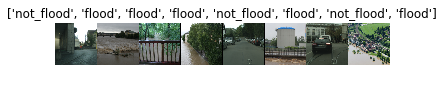

Prediction:


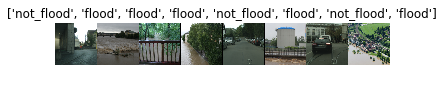

In [18]:
visualize_model(rn18_trained, test_data)

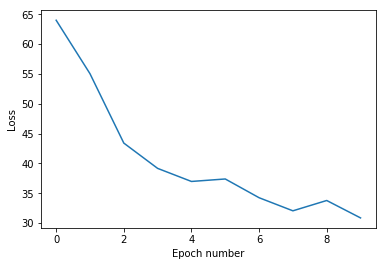

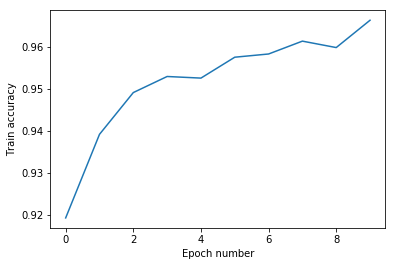

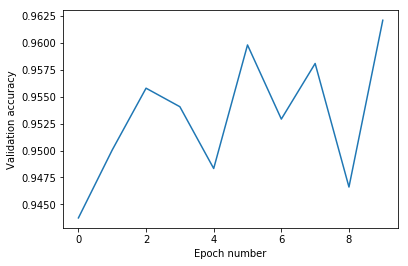

<Figure size 432x288 with 0 Axes>

In [19]:
# graph loss curve
plt.plot(np.arange(10), loss_hist)
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()
plt.savefig('rn18_loss_curve.png')

#graph train accuracy
plt.plot(np.arange(10), train_acc_hist)
plt.xlabel('Epoch number')
plt.ylabel('Train accuracy')
plt.show()
plt.savefig('rn18_train_acc_curve.png')

plt.plot(np.arange(10), val_acc_hist)
plt.xlabel('Epoch number')
plt.ylabel('Validation accuracy')
plt.show()
plt.savefig('rn18_val_acc_curve.png')

In [7]:
model = torch.load('rn_train.pt')